# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# path is the raw csv file
path = r"C:\Users\adame\OneDrive\Documents\GitHub\springboard_repository\Capstone_books\Capstone_books\data\raw\books.csv"
df = pd.read_csv(path, on_bad_lines='warn')

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



#### Data would not load without an error, required skipping fours lines.

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [7]:
# checking for duplicates
df.duplicated().any()

False

In [8]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
df.shape

(11123, 12)

In [10]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### Rename `  num_pages` column to `num_pages`

In [41]:
# remove leading spaces
df.rename(columns={"  num_pages":"num_pages"}, inplace=True)

### Drop the `bookID` column. Seems to be an arbitrary number.

In [12]:
df.drop(columns='bookID', inplace=True)

In [13]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [14]:
df.select_dtypes('object')

,title,authors,isbn,language_code,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,eng,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,eng,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,eng,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,eng,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,eng,9/13/2004,Scholastic
...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,eng,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,0140110879,eng,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,eng,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,0060878827,eng,2/27/2007,Ecco


#### The `isbn` column is listed as an object, I have done some research on this. The `isbn` can have a leading zero and for this reason it should remain an object. 

In [15]:
df['isbn']

0        0439785960
1        0439358078
2        0439554896
3        043965548X
4        0439682584
            ...    
11118    1560254416
11119    0140110879
11120    0140131965
11121    0060878827
11122    8497646983
Name: isbn, Length: 11123, dtype: object

#### Check for any letters in the `isbn` column. 

In [16]:
matches = df[df['isbn'].str.contains('[a-zA-Z]', case=False, na=False)]

In [17]:
matches.count()

title                 984
authors               984
average_rating        984
isbn                  984
isbn13                984
language_code         984
num_pages             984
ratings_count         984
text_reviews_count    984
publication_date      984
publisher             984
dtype: int64

#### There are 984 values in the `isbn` column that contain a letter.

#### Checking for duplicates

In [18]:
df['title'].value_counts()

title
The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: count, Length: 10348, dtype: int64

In [19]:
# check one of the duplicate titles to see what kind of data is present.
df[df['title'] == 'The Iliad']

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


#### This shows there are nine versions of 'The Iliad' in the data. They all have the same `average_rating`, but everything other column holds a different value. 

# Graph data to look for relationships and help understand the distrubution of numerical variables.

### Histograms

Text(0.5, 1.0, 'Distribution')

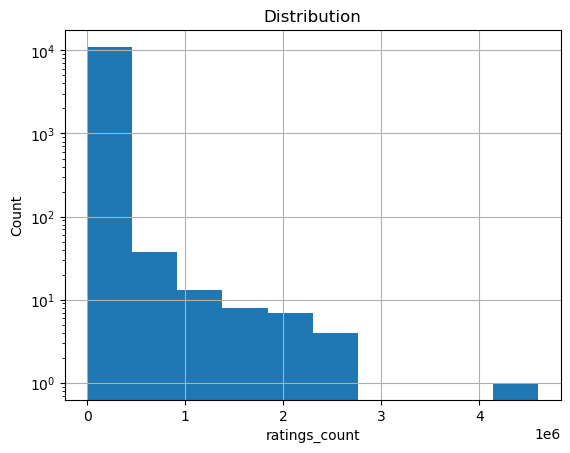

In [20]:
# histogram of ratings_count column
df.ratings_count.hist(bins=10, log=True)

plt.xlabel('ratings_count')
plt.ylabel('Count')
plt.title('Distribution')

Text(0.5, 1.0, 'Distribution')

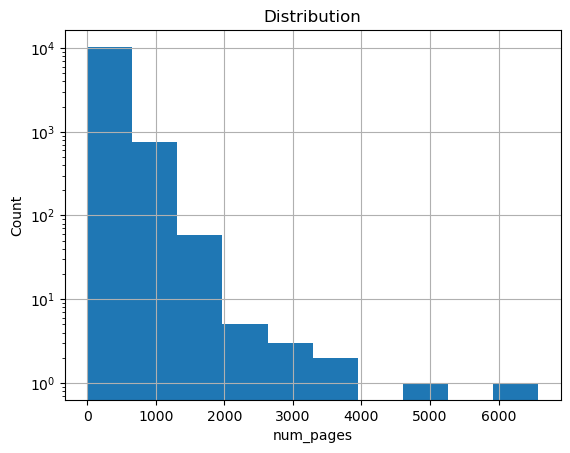

In [21]:
# histogram of num_pages column
df.num_pages.hist(bins=10, log=True)

plt.xlabel('num_pages')
plt.ylabel('Count')
plt.title('Distribution')

Text(0.5, 1.0, 'Rating Distribution')

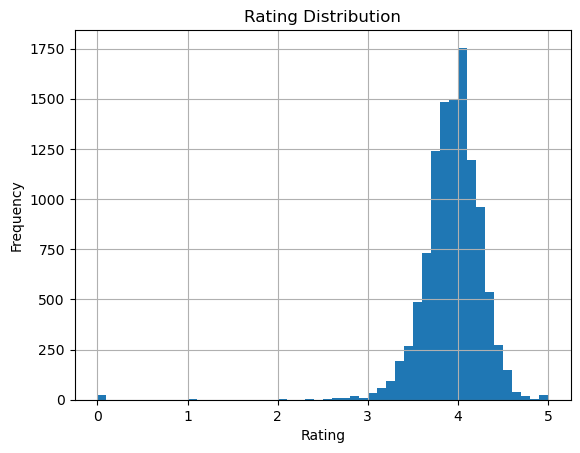

In [22]:
# histogram of average_rating column

df.average_rating.hist(bins=50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

Text(0.5, 1.0, 'Distribution')

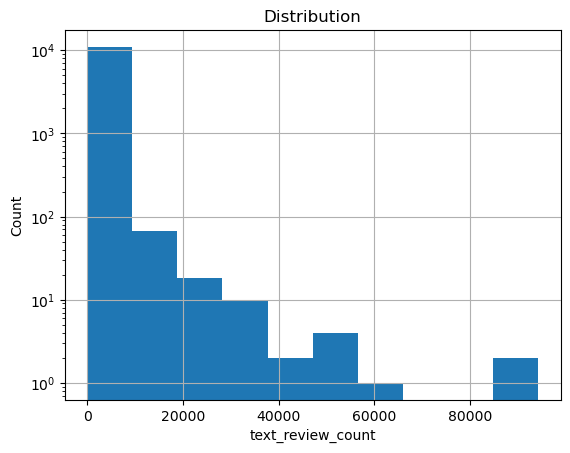

In [23]:
# histogram of text_review_count column

df.text_reviews_count.hist(bins=10, log=True)
plt.xlabel('text_review_count')
plt.ylabel('Count')
plt.title('Distribution')

### Box Plots for outlier detection.

Text(0.5, 0, 'Number of pages')

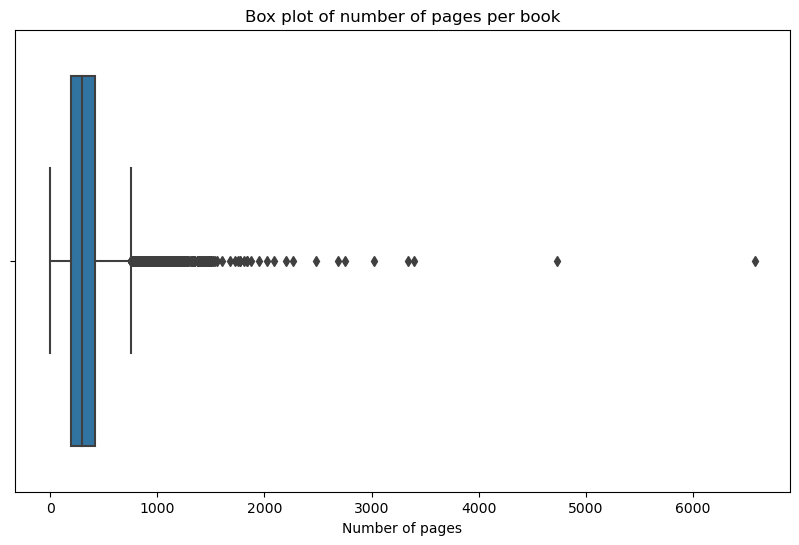

In [24]:
# box plot for `num_pages` column

plt.figure(figsize=(10,6))
sns.boxplot(x=df.num_pages)

plt.title('Box plot of number of pages per book')
plt.xlabel('Number of pages')

Text(0.5, 0, 'Number of ratings')

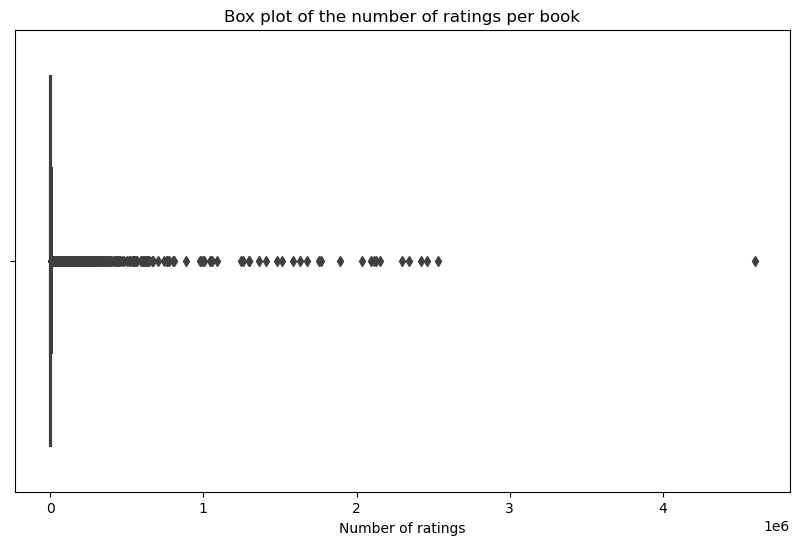

In [25]:
# box plot for `ratings_count` column
plt.figure(figsize=(10,6))
sns.boxplot(x=df.ratings_count)

plt.title('Box plot of the number of ratings per book')
plt.xlabel('Number of ratings')

Text(0.5, 0, 'The count of text_reviews')

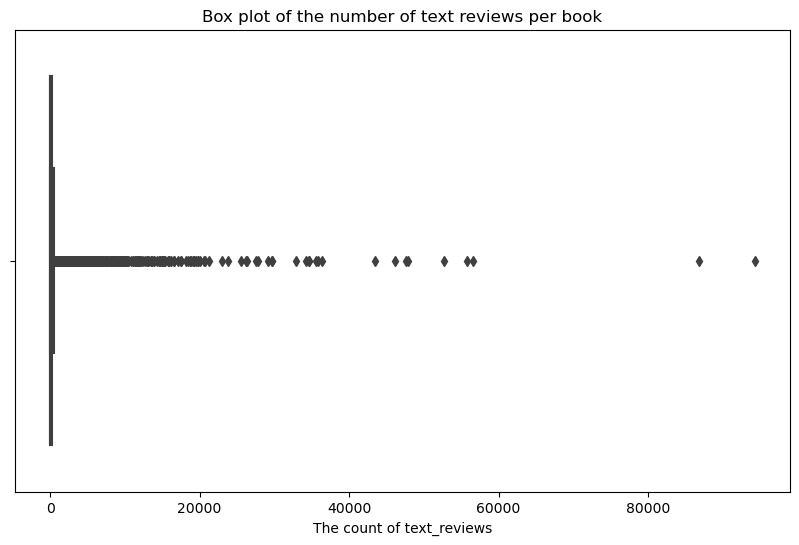

In [26]:
# box plot for `text_reviews_count` column
plt.figure(figsize=(10,6))
sns.boxplot(x=df.text_reviews_count)

plt.title('Box plot of the number of text reviews per book')
plt.xlabel('The count of text_reviews')

### Bar Charts for Categorical Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'ale'),
  Text(1, 0, 'ara'),
  Text(2, 0, 'en-CA'),
  Text(3, 0, 'en-GB'),
  Text(4, 0, 'en-US'),
  Text(5, 0, 'eng'),
  Text(6, 0, 'enm'),
  Text(7, 0, 'fre'),
  Text(8, 0, 'ger'),
  Text(9, 0, 'gla'),
  Text(10, 0, 'glg'),
  Text(11, 0, 'grc'),
  Text(12, 0, 'ita'),
  Text(13, 0, 'jpn'),
  Text(14, 0, 'lat'),
  Text(15, 0, 'msa'),
  Text(16, 0, 'mul'),
  Text(17, 0, 'nl'),
  Text(18, 0, 'nor'),
  Text(19, 0, 'por'),
  Text(20, 0, 'rus'),
  Text(21, 0, 'spa'),
  Text(22, 0, 'srp'),
  Text(23, 0, 'swe'),
  Text(24, 0, 'tur'),
  Text(25, 0, 'wel'),
  Text(26, 0, 'zho')])

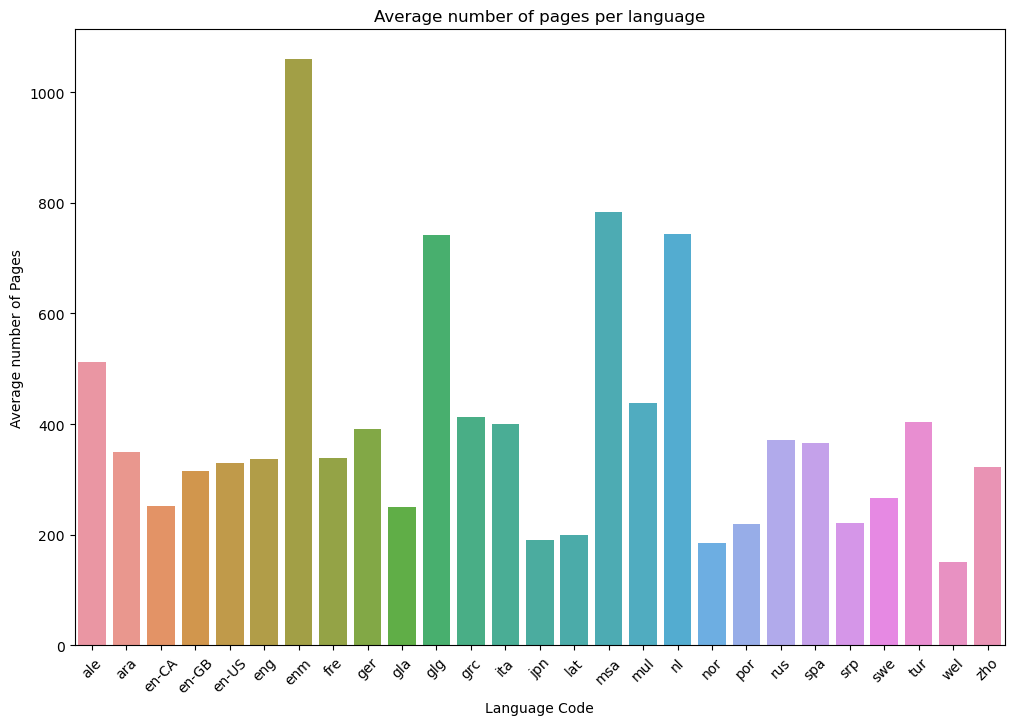

In [27]:
# bar chart for `language_code` column

#get the average number of pages per language code
avg_pages_per_lang = df.groupby('language_code')['num_pages'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='language_code', y='num_pages', data=avg_pages_per_lang)

plt.title('Average number of pages per language')
plt.xlabel('Language Code')
plt.ylabel('Average number of Pages')
plt.xticks(rotation=45) #rotate the labels


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

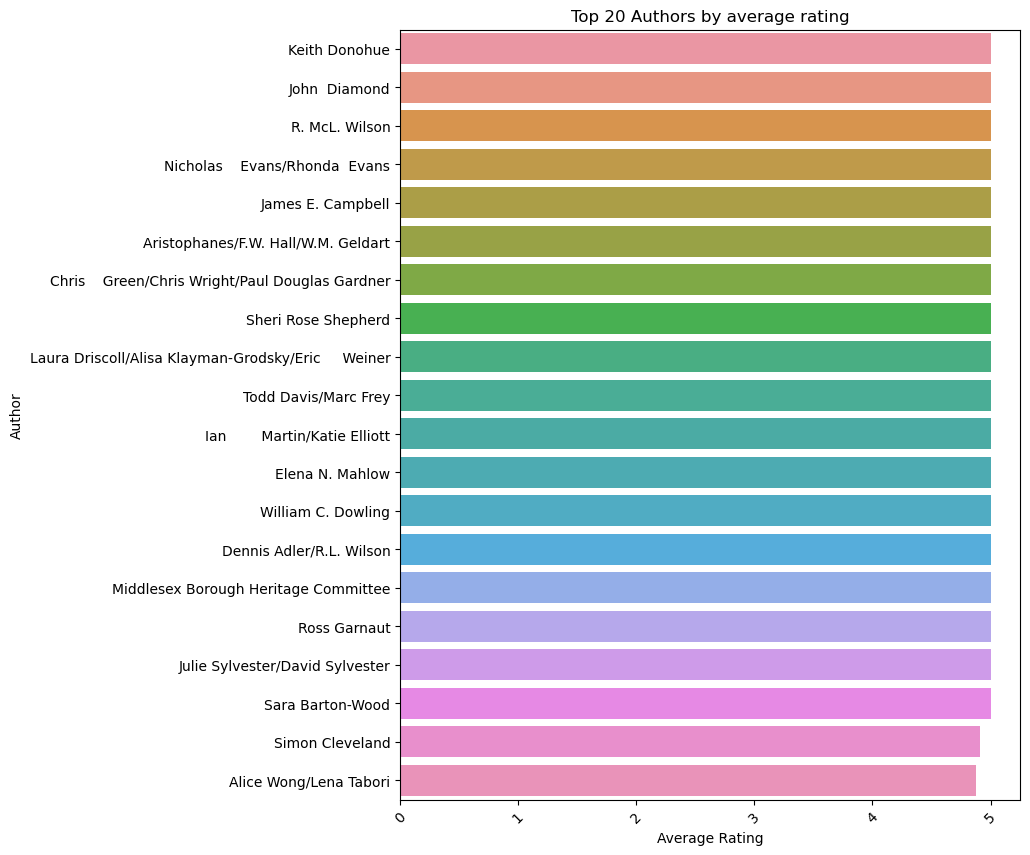

In [28]:
# bar chart for `authors` column
average_rating_per_author = df.groupby('authors')['average_rating'].mean().reset_index()
# sort the dataframe
sorted_average_rating_per_author = average_rating_per_author.sort_values(by='average_rating', ascending=False)
#select the top 20
top_authors = sorted_average_rating_per_author.head(20)

plt.figure(figsize=(8,10))
sns.barplot(x='average_rating', y= 'authors', data=top_authors)

plt.title('Top 20 Authors by average rating')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

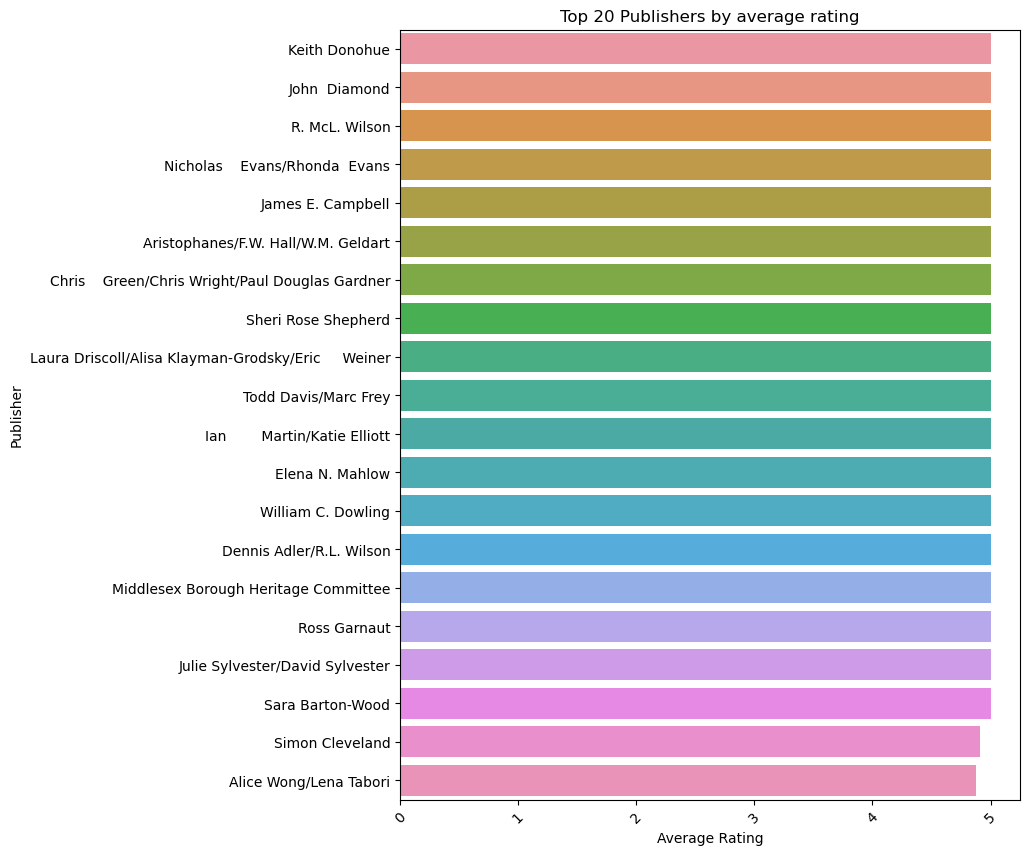

In [29]:
# bar chart for `publishers` column
average_rating_per_publisher = df.groupby('publisher')['average_rating'].mean().reset_index()
# sort the dataframe
sorted_average_rating_per_publisher = average_rating_per_publisher.sort_values(by='average_rating', ascending=False)
#select the top 20
top_publisher = sorted_average_rating_per_publisher.head(20)

plt.figure(figsize=(8,10))
sns.barplot(x='average_rating', y= 'authors', data=top_authors)

plt.title('Top 20 Publishers by average rating')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.xticks(rotation=45)

### Time series analysis of the number of books published per year

Text(0, 0.5, 'Number of books published')

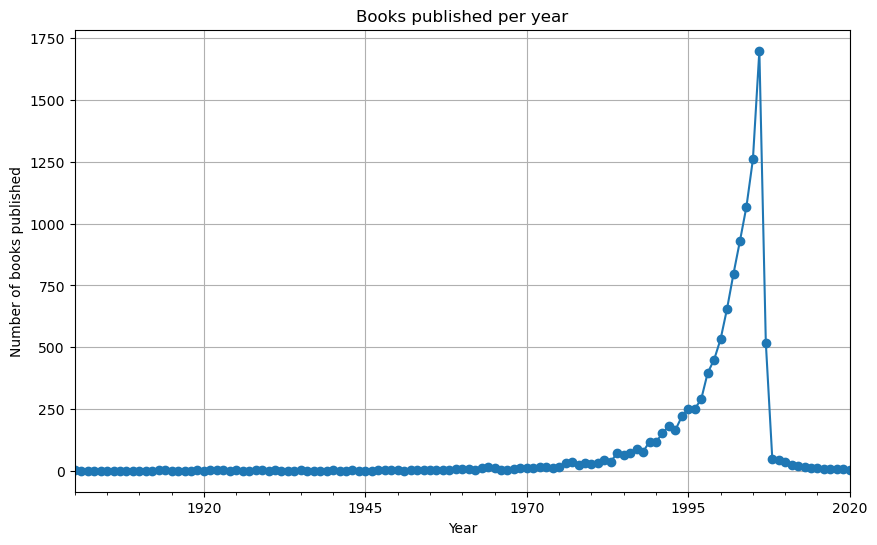

In [44]:
#get all books published in a year by title
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')

data = df.set_index('publication_date')

books_per_year = data.resample('Y').size()

plt.figure(figsize=(10,6))
books_per_year.plot(kind='line', marker='o')

plt.grid(True)

plt.title('Books published per year')
plt.xlabel('Year')
plt.ylabel('Number of books published')

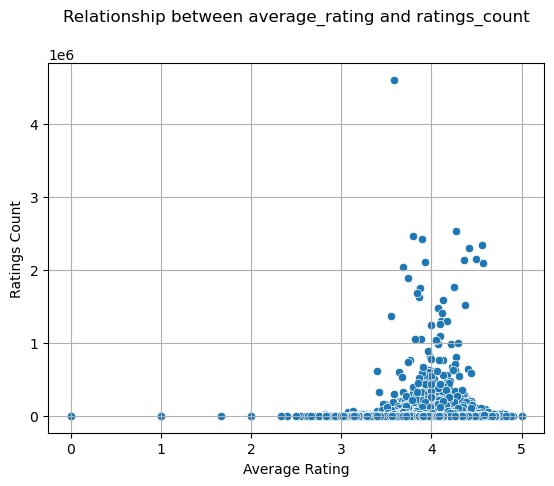

In [43]:
#average rating vs rating count
sns.scatterplot(x='average_rating', y='ratings_count', data=df)

plt.title('Relationship between average_rating and ratings_count\n')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.grid(True)

plt.show()

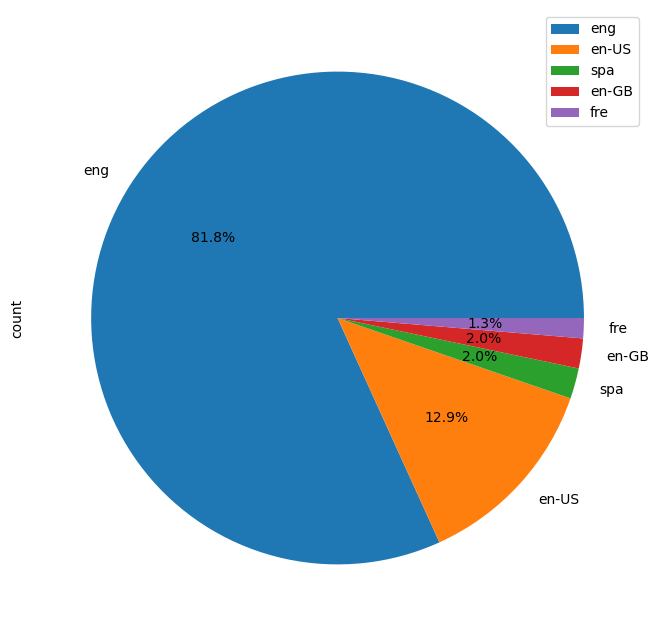

In [35]:
# charting the top 5 languages
df['language_code'].value_counts().head().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8)).legend()